# Visualize Prediction

## Imports and Functions

In [1]:
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout, GRU, Conv1D, Flatten, Reshape

import os
import numpy as np
import sys
import tensorflow as tf
import random
import keras

SEED = 42

def set_seeds(seed=SEED):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
    keras.utils.set_random_seed(seed)

def set_global_determinism(seed=SEED):
    set_seeds(seed=seed)

    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    
    tf.config.threading.set_inter_op_parallelism_threads(1)
    tf.config.threading.set_intra_op_parallelism_threads(1)

# Call the above function with seed value
set_global_determinism(seed=SEED)

In [2]:
# Add the folder to the Python path

os.chdir("../")
# change working directory to project's root path
print(os.getcwd())

FIRST_YEAR= 1972
FREQUENCY= "monthly"

c:\Users\marti\Desktop\data\hw_extra


In [3]:
folder_path = os.path.abspath("functions/") #INPUT_PATH)#'path_to_your_folder')  # Replace with the actual folder path
sys.path.insert(0, folder_path)

from Predictions import (
    PredictionExperiment,
    PredictionModel,
    get_info_experiment
)

c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [4]:
indices_of_interest = ["HWN", "HWF", "HWD", "HWM", "HWA"]


## Chile good predictions per season

In [5]:
region="chile"
metadata = pd.read_csv(f"data/locally_features/{region}/metadata.csv")
metadata.reset_index(inplace=True, drop=True)
display(metadata)

,id,filename,season,indices,stations
0,41e7367e,predictor_41e7367e_1.parquet,1,4914419e-626d65d6-7fb9d7a1-68aad4b4-9a40f504-b...,330007
1,41e7367e,predictor_41e7367e_2.parquet,2,4914419e-626d65d6-7fb9d7a1-68aad4b4-9a40f504-b...,330007
2,41e7367e,predictor_41e7367e_3.parquet,3,4914419e-626d65d6-7fb9d7a1-68aad4b4-9a40f504-b...,330007
3,41e7367e,predictor_41e7367e_4.parquet,4,4914419e-626d65d6-7fb9d7a1-68aad4b4-9a40f504-b...,330007
4,41e7367e,predictor_41e7367e_5.parquet,5,4914419e-626d65d6-7fb9d7a1-68aad4b4-9a40f504-b...,330007
...,...,...,...,...,...
139,a4d41909,predictor_a4d41909_8.parquet,8,e01fec28-2812e0a6-208ab882-266e3e9c-2dbfd54e-a...,chile_central_sur
140,a4d41909,predictor_a4d41909_9.parquet,9,e01fec28-2812e0a6-208ab882-266e3e9c-2dbfd54e-a...,chile_central_sur
141,a4d41909,predictor_a4d41909_10.parquet,10,e01fec28-2812e0a6-208ab882-266e3e9c-2dbfd54e-a...,chile_central_sur
142,a4d41909,predictor_a4d41909_11.parquet,11,e01fec28-2812e0a6-208ab882-266e3e9c-2dbfd54e-a...,chile_central_sur


In [6]:
ids_to_execute = ["e0ec7330"]
get_info_experiment(ids_to_execute[0], f"data/locally_features/{region}/metadata.csv", "data/my_indices/metadata.csv", "data/extra_indices/metadata.csv")

,filename,method,rolling,variables,boxes,reference_period,target_period
id,,,,,,,
4914419e,index_4914419e.parquet,anom,1,SST,190|240|-5|5,1980-2010,1972-2022
626d65d6,index_626d65d6.parquet,anom,1,SST,270|280|-10|0,1980-2010,1972-2022
7fb9d7a1,index_7fb9d7a1.parquet,anom,1,T,286|288|-42|-33,1980-2010,1972-2022
68aad4b4,index_68aad4b4.parquet,max,1,MSL,260|284|-44|-17,1980-2010,1972-2022
9a40f504,index_9a40f504.parquet,anom,1,U,287.5|289.5|-37|-33,1980-2010,1972-2022
be4db284,index_be4db284.parquet,anom,1,U,286.5|288.5|-42|-37,1980-2010,1972-2022
7cdf2fbb,index_7cdf2fbb.parquet,anom,1,MSL,286|292|-52|-40,1980-2010,1972-2022
349761ab,index_349761ab.parquet,anom,1,MSL,286|288.5|-33|-28,1980-2010,1972-2022
240bd995,index_240bd995.parquet,anom,1,MSL,280|286|-38|-30,1980-2010,1972-2022


Executing e0ec7330 iter 1
2/2 [==============================] - 0s 3ms/step


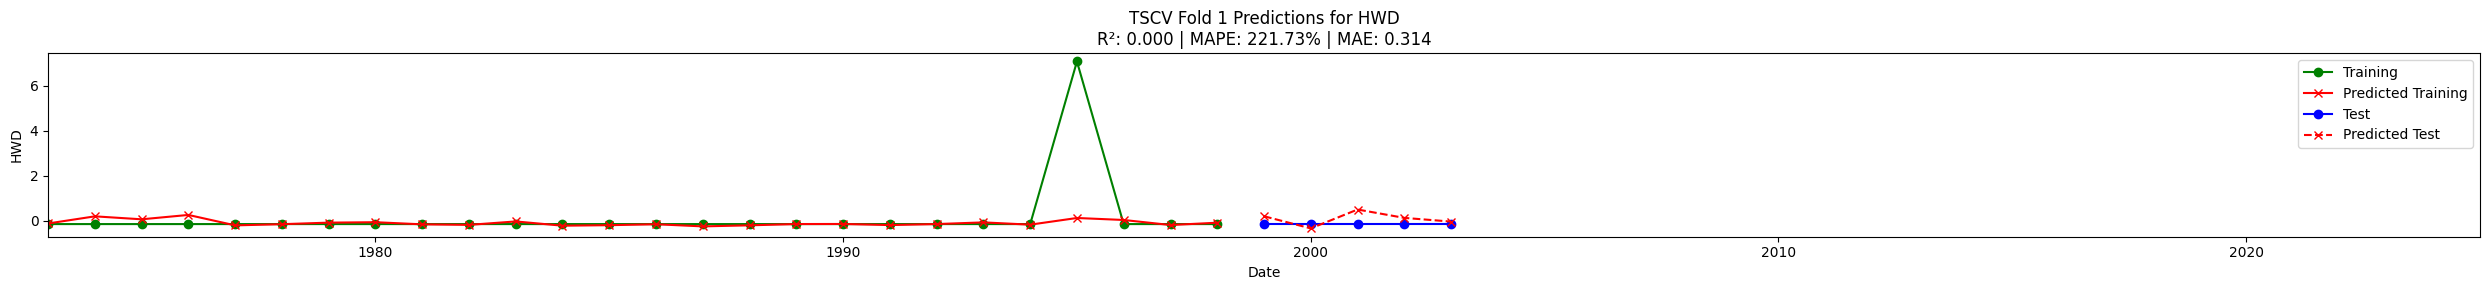

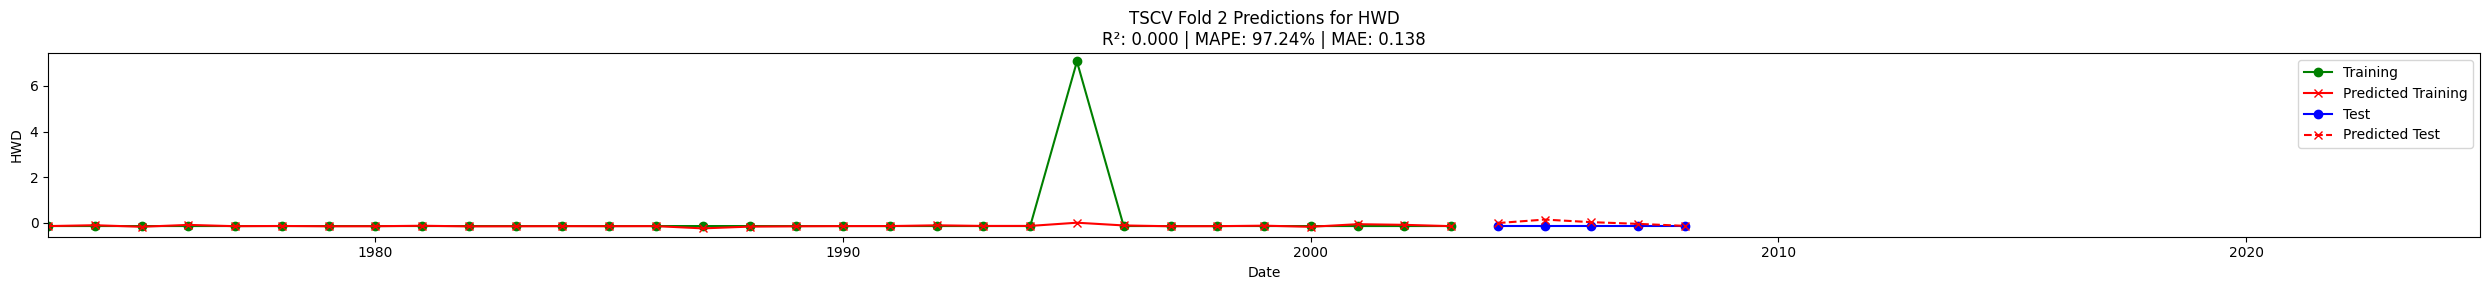

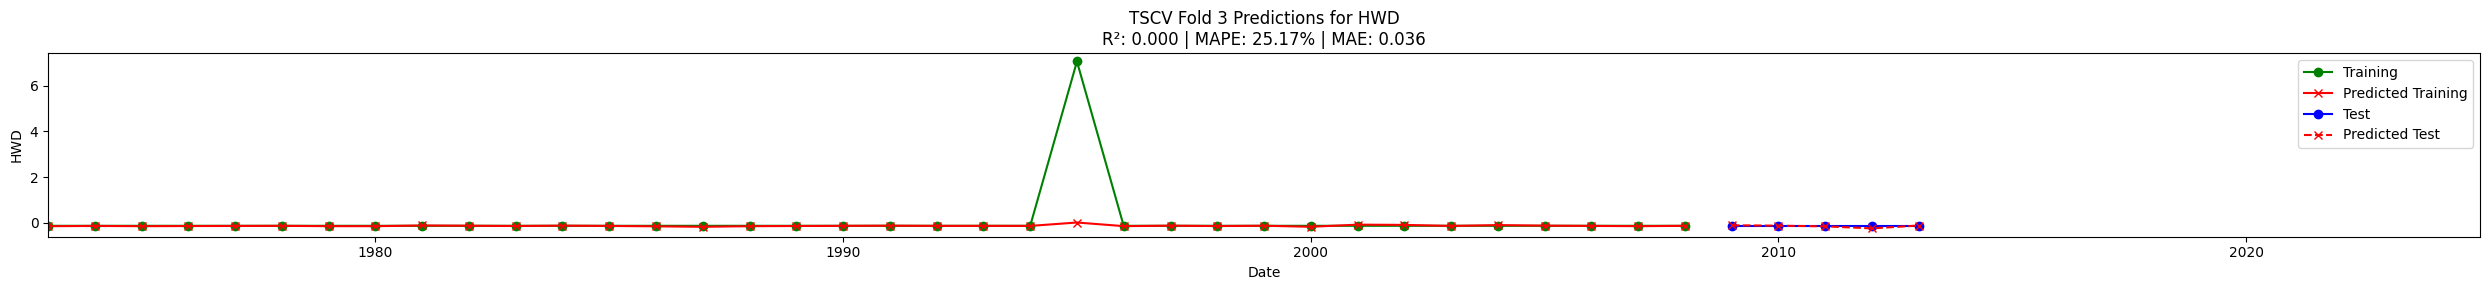

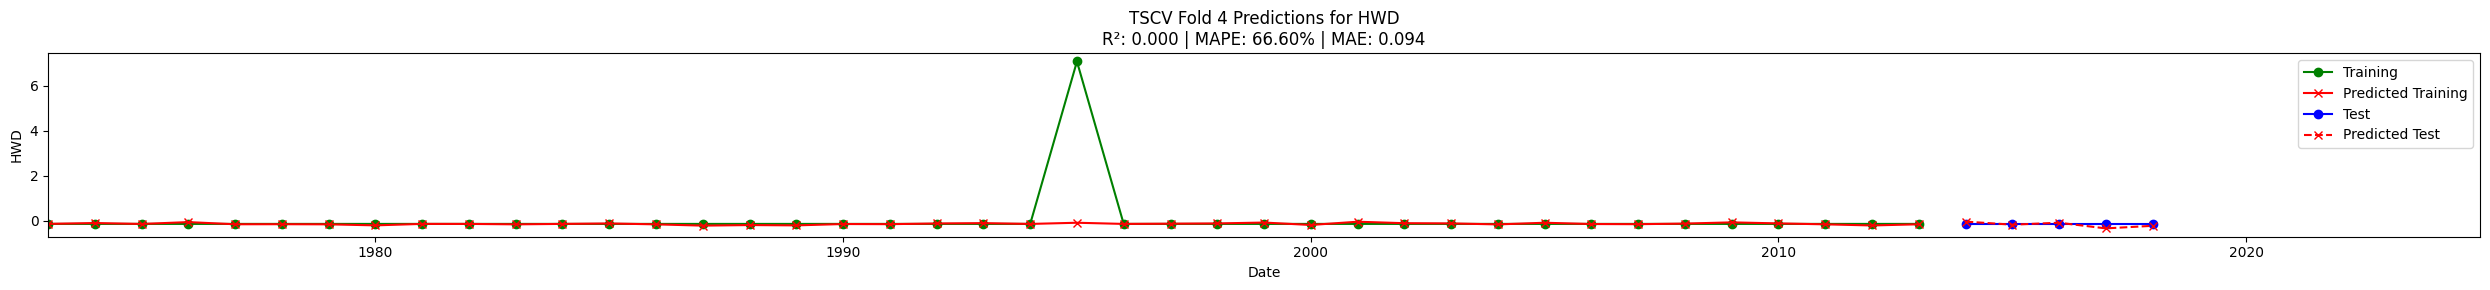

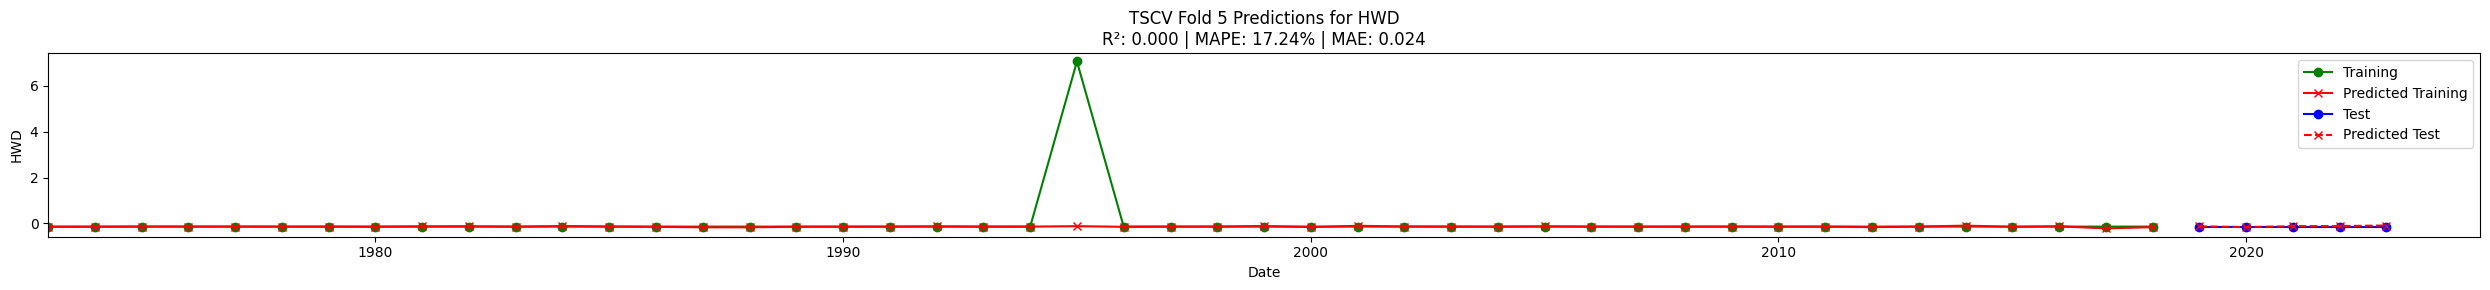

In [8]:
k=0
season = 6
for id in ids_to_execute:
    k+=1
    print("Executing",id, "iter", k)
    data = {season: pd.read_parquet(f"data/locally_features/{region}/predictor_{id}_{season}.parquet")}
    model = Sequential([
        Conv1D(16, kernel_size=1, activation="relu", input_shape=(1, len(data[season].columns) - len(indices_of_interest))),
        Reshape((1, 16)),  # Back to time dimension
        SimpleRNN(8, activation="tanh"),
        Dropout(0.1),
        Dense(len(indices_of_interest))
    ])
    experiment_1 = PredictionExperiment(data, indices_of_interest, [model], ["CNNRNN16"], 5, id)
    experiment_1.execute_experiment(label_plot="HWD")

In [9]:
ids_to_execute = ["231a6330"]
get_info_experiment(ids_to_execute[0], f"data/locally_features/{region}/metadata.csv", "data/my_indices/metadata.csv", "data/extra_indices/metadata.csv")

,filename,method,rolling,variables,boxes,reference_period,target_period
id,,,,,,,
4914419e,index_4914419e.parquet,anom,1,SST,190|240|-5|5,1980-2010,1972-2022
626d65d6,index_626d65d6.parquet,anom,1,SST,270|280|-10|0,1980-2010,1972-2022
7fb9d7a1,index_7fb9d7a1.parquet,anom,1,T,286|288|-42|-33,1980-2010,1972-2022
68aad4b4,index_68aad4b4.parquet,max,1,MSL,260|284|-44|-17,1980-2010,1972-2022
9a40f504,index_9a40f504.parquet,anom,1,U,287.5|289.5|-37|-33,1980-2010,1972-2022
be4db284,index_be4db284.parquet,anom,1,U,286.5|288.5|-42|-37,1980-2010,1972-2022
7cdf2fbb,index_7cdf2fbb.parquet,anom,1,MSL,286|292|-52|-40,1980-2010,1972-2022
349761ab,index_349761ab.parquet,anom,1,MSL,286|288.5|-33|-28,1980-2010,1972-2022
240bd995,index_240bd995.parquet,anom,1,MSL,280|286|-38|-30,1980-2010,1972-2022


Executing 231a6330 iter 1
2/2 [==============================] - 0s 2ms/step


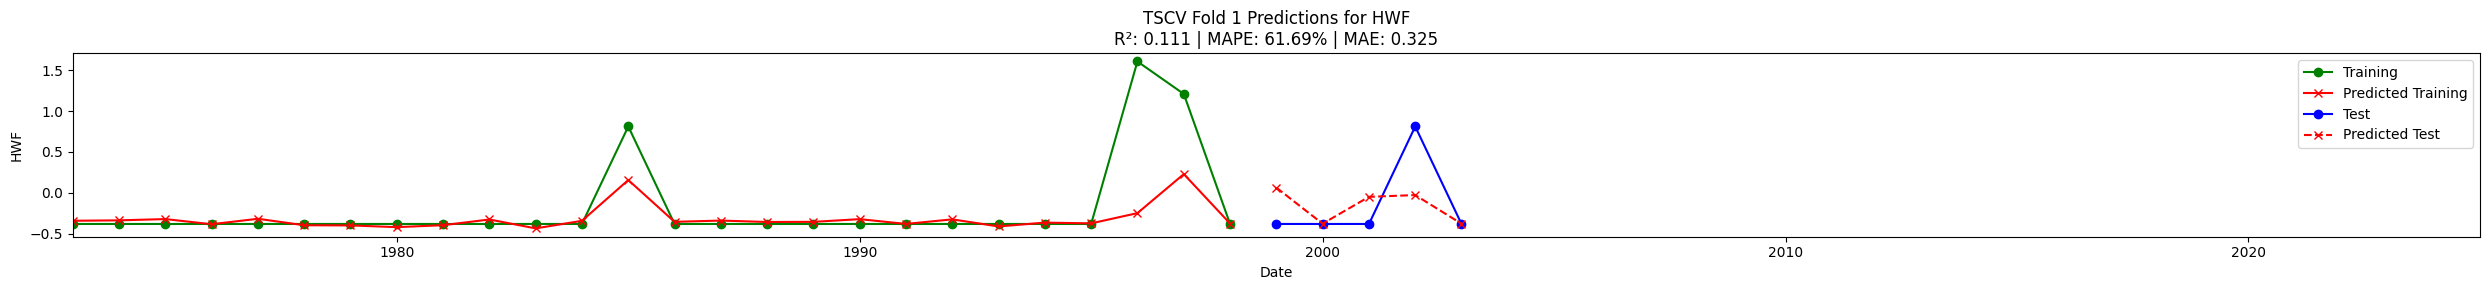

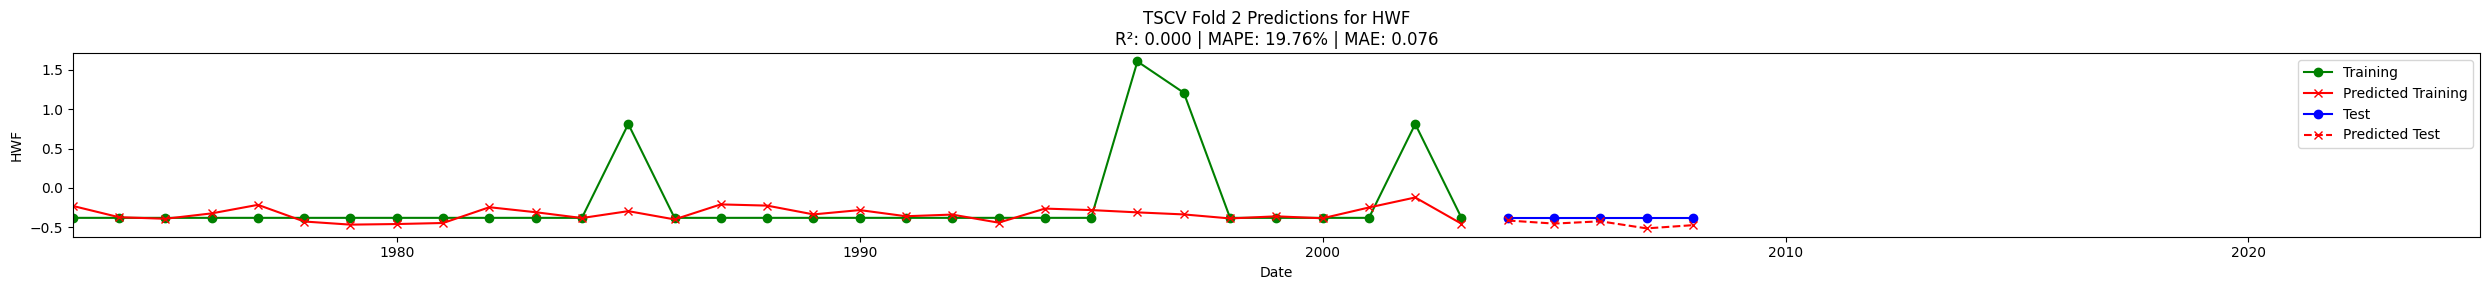

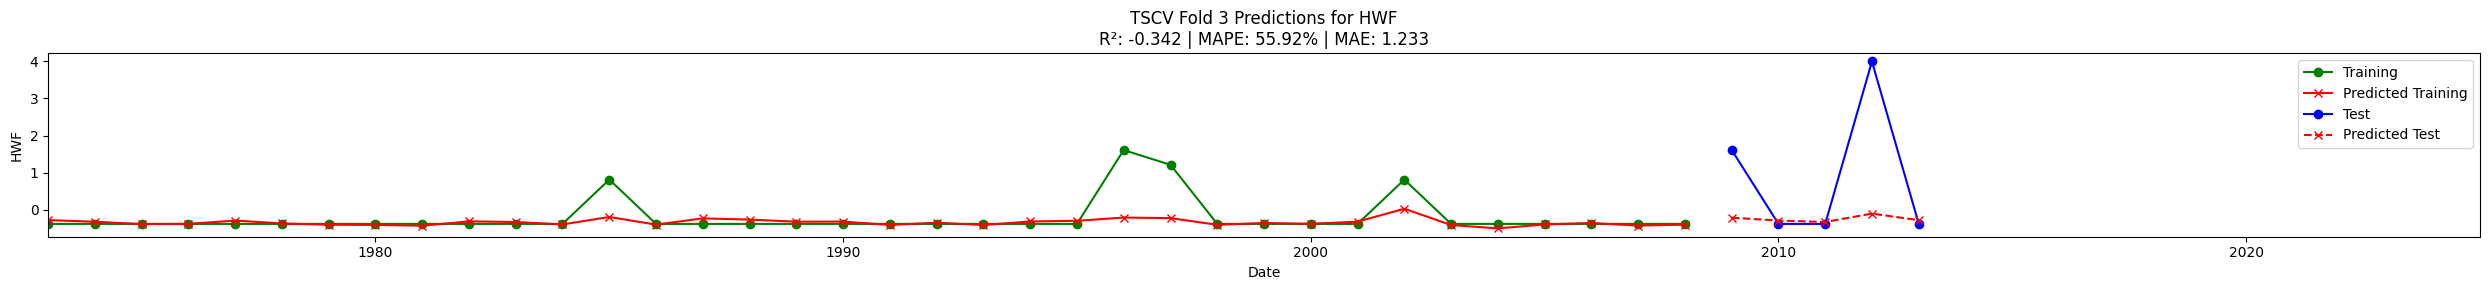

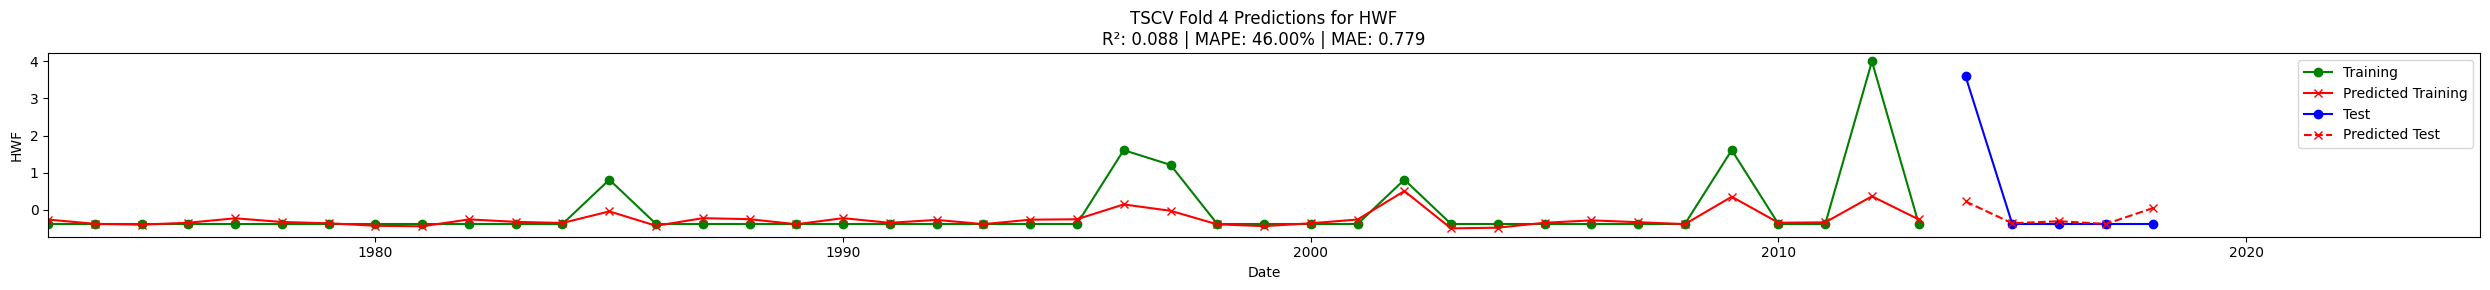

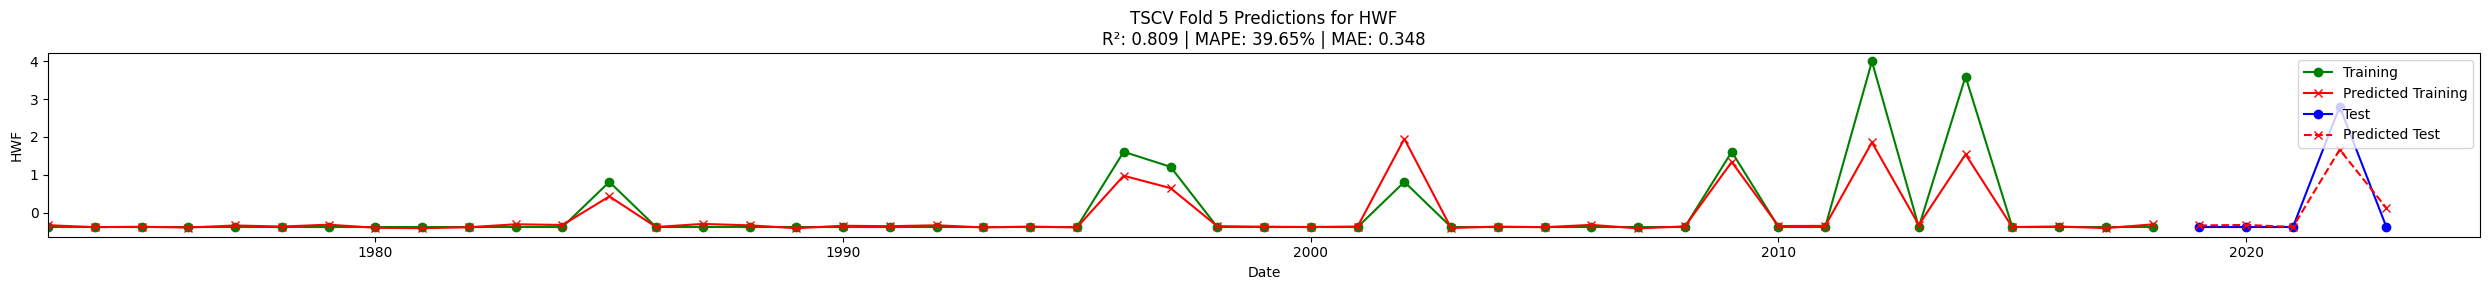

In [11]:
k=0
season = 12
for id in ids_to_execute:
    k+=1
    print("Executing",id, "iter", k)
    data = {season: pd.read_parquet(f"data/locally_features/{region}/predictor_{id}_{season}.parquet")}
    model = Sequential([
        SimpleRNN(16, activation="tanh", input_shape=(1, len(data[season].columns) - len(indices_of_interest))),
        Dropout(0.1),  # Regularization
        Dense(8, activation="relu"),
        Dense(len(indices_of_interest))  # Predict 5 indices
        ])
    experiment_1 = PredictionExperiment(data, indices_of_interest, [model], ["RNN16"], 5, id)
    experiment_1.execute_experiment(label_plot="HWF")

Executing 231a6330 iter 1
2/2 [==============================] - 0s 4ms/step


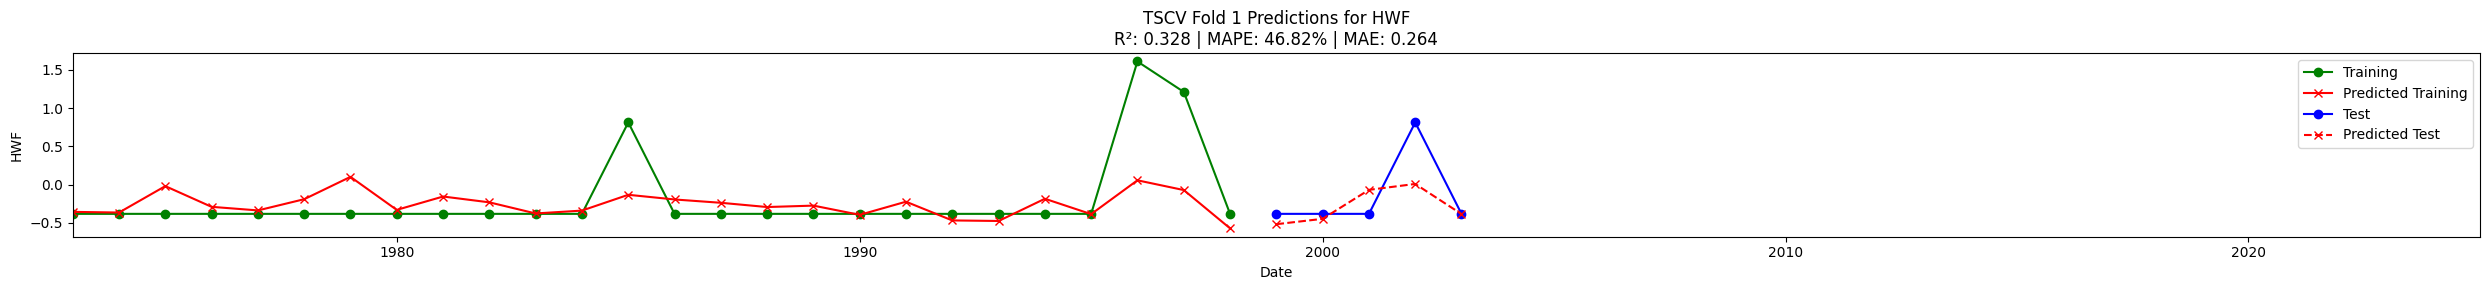

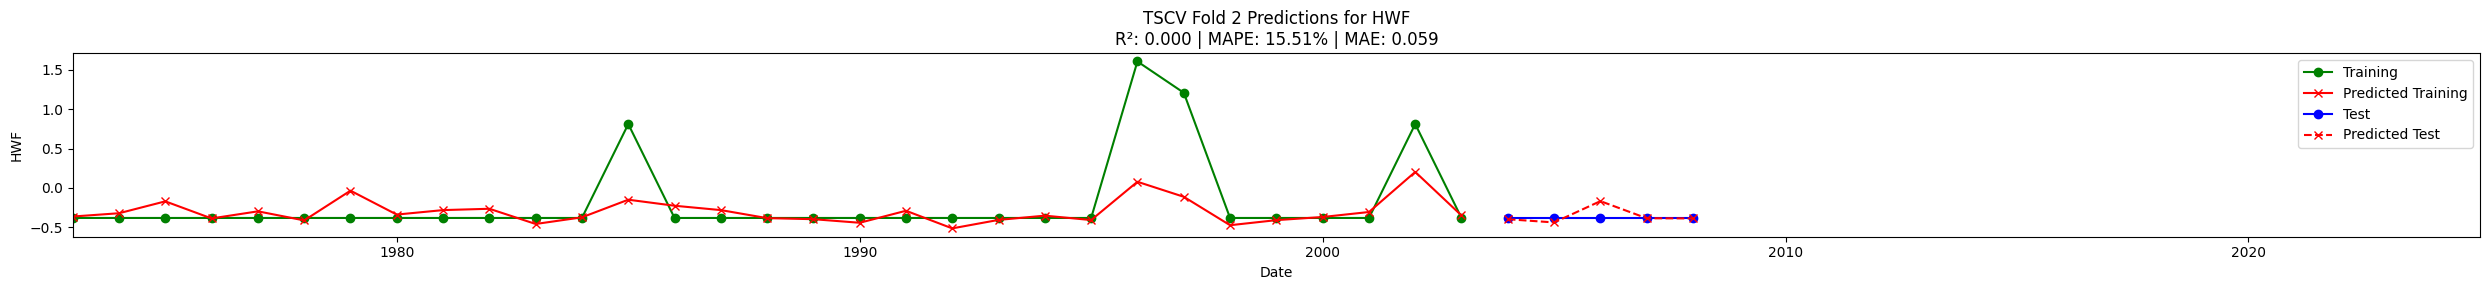

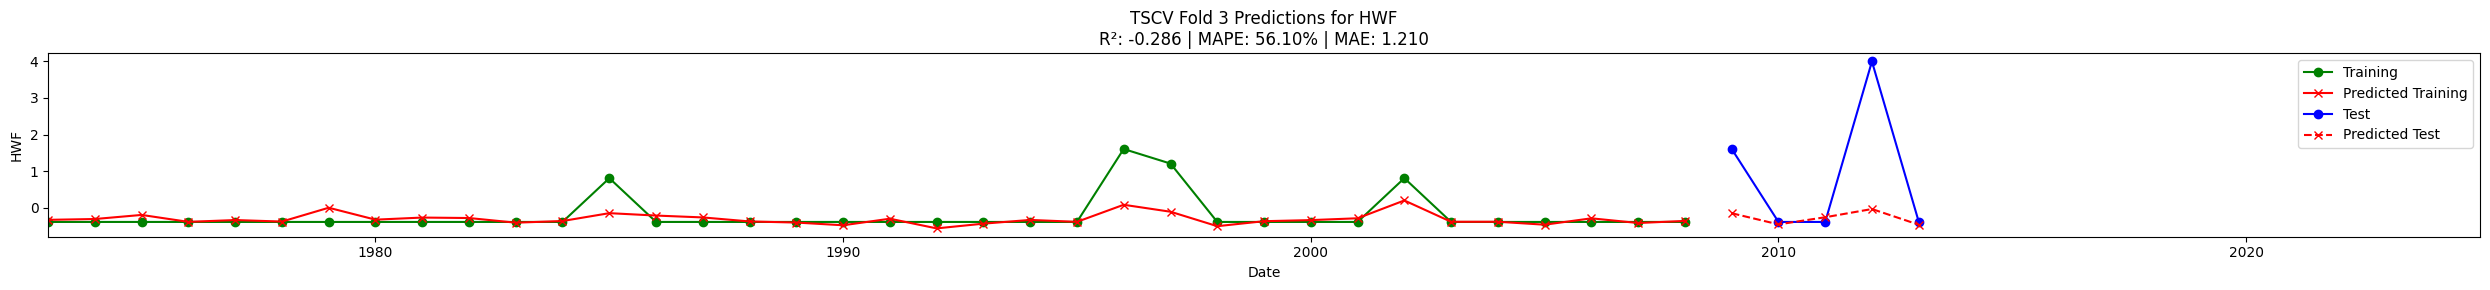

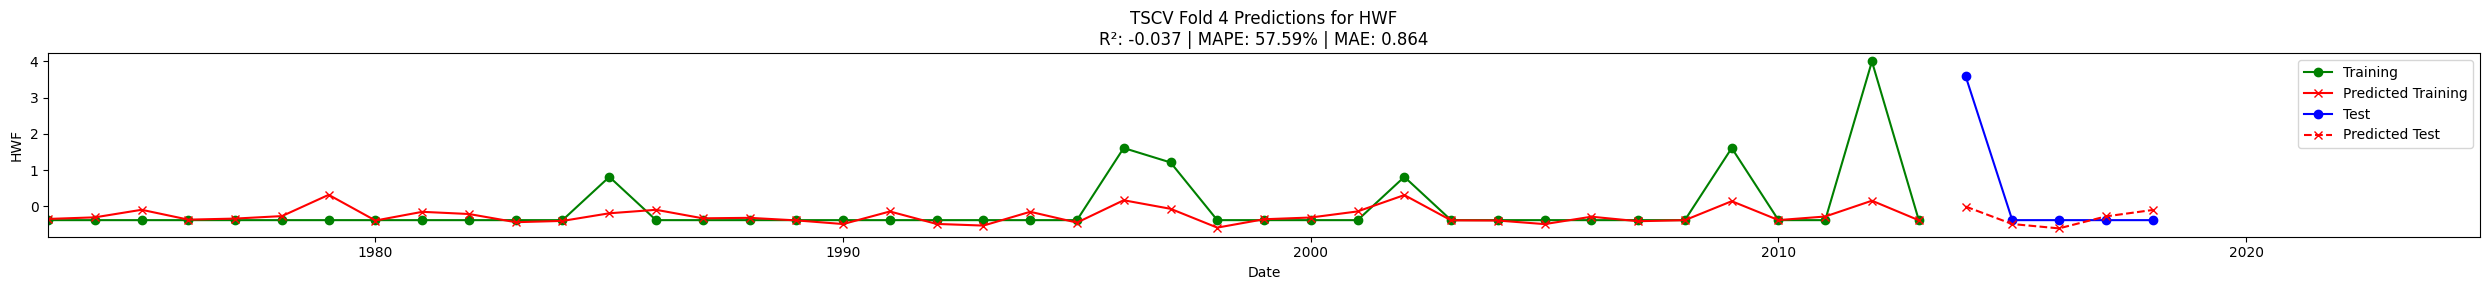

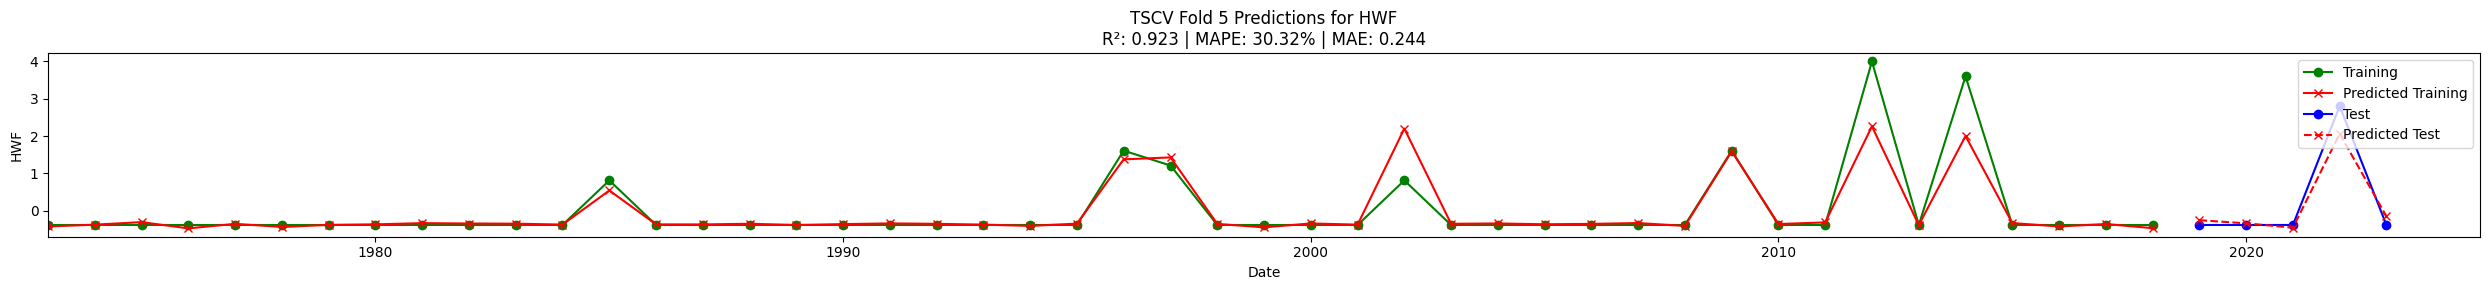

In [15]:
k=0
season = 12
for id in ids_to_execute:
    k+=1
    print("Executing",id, "iter", k)
    data = {season: pd.read_parquet(f"data/locally_features/{region}/predictor_{id}_{season}.parquet")}
    model = Sequential([
        SimpleRNN(16, activation="tanh", input_shape=(1, len(data[season].columns) - len(indices_of_interest))),
        Dropout(0.1),  # Regularization
        Dense(8, activation="relu"),
        Dense(len(indices_of_interest))  # Predict 5 indices
        ])
    experiment_1 = PredictionExperiment(data, indices_of_interest, [model], ["RNN16"], 5, id)
    experiment_1.execute_experiment(label_plot="HWF")